In [8]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_factorial(n):
    if n == 1 or n == 0:
        return 1
    return n*get_factorial(n-1)

In [10]:
def create_likelihood_plot(n, tot_heads, plot=True):
    
    likelihood_range = np.arange(0,1.01,0.01)
    likelihood = []
    combinatorial_val = get_factorial(n)/ (get_factorial(tot_heads)*get_factorial(n - tot_heads))
    for lr in likelihood_range:
        
        likelihood.append(combinatorial_val*(lr**tot_heads)*((1-lr)**(n-tot_heads)))
    if plot:
        plt.figure(figsize=(20,5))
        plt.plot(likelihood_range, likelihood, 'o-')
        plt.xlabel("theta")
        plt.ylabel("likelihood")
        plt.title("Likelihood Curve")
    return likelihood

In [11]:
def create_likelihood_plot_scipy(n, k, plot=True):
    likelihood_range = np.arange(0, 1.01, 0.01)
    likelihood = []
    for lr in likelihood_range:
        likelihood.append(st.binom.pmf(k, n, lr))
    if plot:
        plt.figure(figsize=(20,5))
        plt.plot(likelihood_range, likelihood, 'o-')
        plt.xlabel("theta")
        plt.ylabel("likelihood")
        plt.title("Likelihood Curve")
    return likelihood   

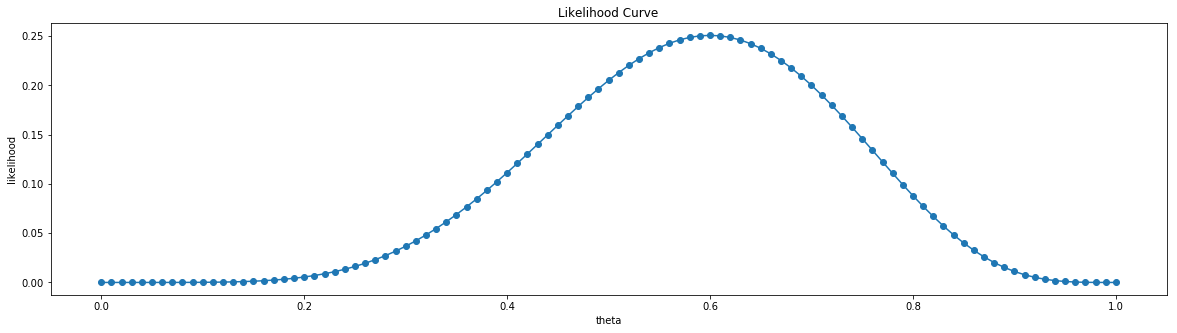

In [12]:
likelihood_6_scipy = create_likelihood_plot_scipy(10, 6)

In [13]:
np.sum(likelihood_6_scipy)

9.0909090914088875

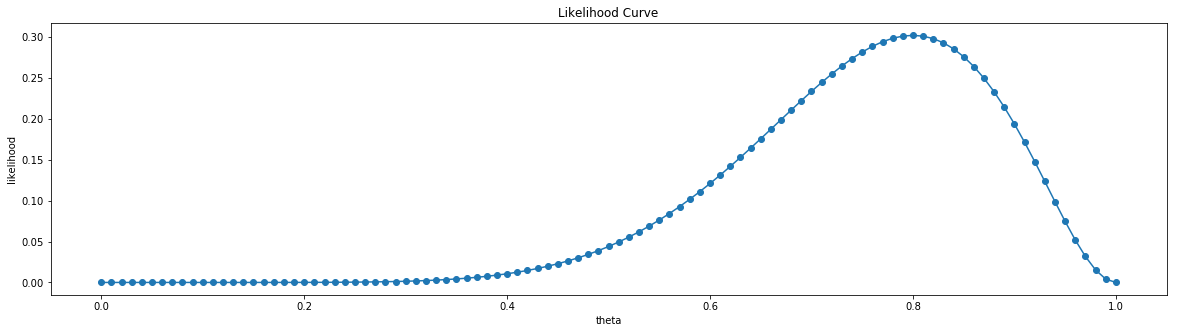

In [14]:
likelihood_8 = create_likelihood_plot(10, 8)

In [15]:
def get_likelihood_for_theta(n, k, theta=0.5):

    
    return st.binom.pmf(k, n, theta)

In [16]:
get_likelihood_for_theta(10, 8)

0.043945312499999993

In [18]:
get_likelihood_for_theta(100, 64, 0.64)

0.082881952002791692

In [19]:
get_likelihood_for_theta(100, 64, 0.64) / get_likelihood_for_theta(100, 64, 0.5)

53.138333358729632

In [20]:
get_likelihood_for_theta(280, 143, 0.52) / get_likelihood_for_theta(280, 143, 0.5)

1.0160765914945966

In [83]:
get_likelihood_for_theta(10, 8, 0.8)/ get_likelihood_for_theta(10, 8, 0.5)

6.8719476736000011

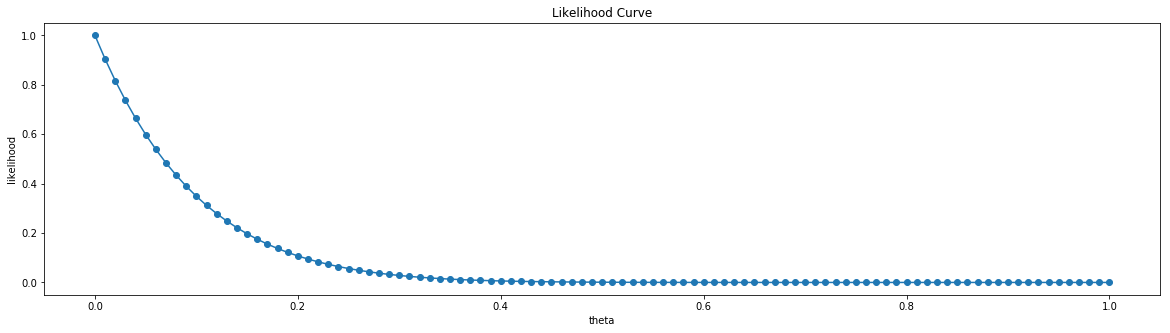

In [30]:
likelihood_0 = create_likelihood_plot(10, 0)

In [31]:
likelihood_4_10 = create_likelihood_plot(10, 4,False )
likelihood_8_10 = create_likelihood_plot(10, 8,False)
likelihood_12_20 = create_likelihood_plot(20, 12,False)

In [36]:
# Normalizing the values
likelihood_4_10 = np.array(likelihood_4_10)/ np.max(likelihood_4_10)

likelihood_8_10 = np.array(likelihood_8_10)/ np.max(likelihood_8_10)

likelihood_12_20 = np.array(likelihood_12_20)/ np.max(likelihood_12_20)


In [37]:
# getting product of likelihood of 4 and 8 heads out of 10
likelihood_4_10_8_10 = np.array(likelihood_4_10) * np.array(likelihood_8_10)

In [39]:
likelihood_4_10_8_10 = likelihood_4_10_8_10 / np.max(likelihood_4_10_8_10)

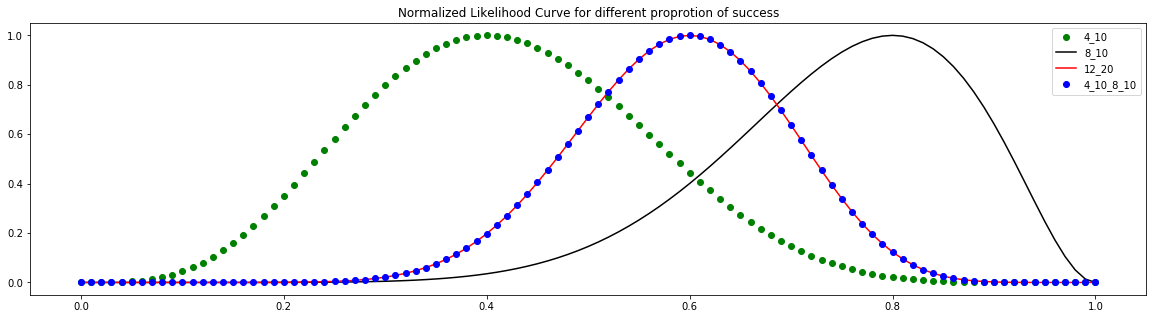

In [42]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,1.01, 0.01), likelihood_4_10, 'go', label="4_10")
plt.plot(np.arange(0,1.01, 0.01), likelihood_8_10, 'k-', label="8_10")
plt.plot(np.arange(0,1.01, 0.01), likelihood_12_20, 'r-', label="12_20")
plt.plot(np.arange(0,1.01, 0.01), likelihood_4_10_8_10, 'bo', label="4_10_8_10")
plt.legend()
plt.title("Normalized Likelihood Curve for different proprotion of success")

#### Analyzing likelihood curve with incresing sample size for same similar proportion of success

In [72]:
likelihood_5_10 = np.array(create_likelihood_plot_scipy(10, 5, False))
likelihood_50_100 = np.array(create_likelihood_plot_scipy(100, 50, False))
likelihood_500_1000 = np.array(create_likelihood_plot_scipy(1000, 500, False))

In [73]:
likelihood_5_10 = likelihood_5_10/np.max(likelihood_5_10) 
likelihood_50_100 = likelihood_50_100/np.max(likelihood_50_100)
likelihood_500_1000 = likelihood_500_1000/np.max(likelihood_500_1000)

In [74]:
len(likelihood_50_100)

101

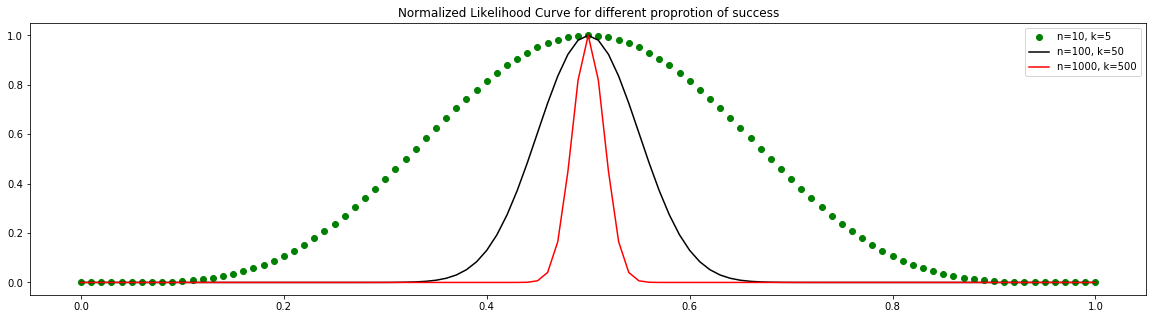

In [79]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,1.01, 0.01), likelihood_5_10, 'go', label="n=10, k=5")
plt.plot(np.arange(0,1.01, 0.01), likelihood_50_100, 'k-', label="n=100, k=50")
plt.plot(np.arange(0,1.01, 0.01), likelihood_500_1000, 'r-', label="n=1000, k=500")

plt.legend()
plt.title("Normalized Likelihood Curve for different proprotion of success")

- As sample size increases, the likelihood distribution curve becomes narrower around most likely value of the theta or 'p'
- Same is observed by law of large number

--------------------
- Likelihood ratio gives the relative evidence between Null Hypothesis and Alternate Hypothesis
- $$LR = H0 / H1 $$

In [84]:
# H0: coin is fair i.e. theta = 0.5
# H1: coin is un-fair i.e. theta = 0.8
# LR = L(theta = 0.8)/ L(theta=0.5)

print("Likelihood ratio {}".format(get_likelihood_for_theta(10,8,0.8)/ get_likelihood_for_theta(10, 8, 0.5)))

Likelihood ratio 6.871947673600001


In [86]:
print("Likelihood ratio for fair coin, when 4 head is observed from 10 toss {}".format(
get_likelihood_for_theta(10,4,0.5)/ get_likelihood_for_theta(10, 4, 0.8)))

Likelihood ratio for fair coin, when 4 head is observed from 10 toss 37.252902984619176


In [87]:
get_likelihood_for_theta(10, 4, 0.5)

0.20507812500000022

In [88]:
get_likelihood_for_theta(10, 4, 0.8)

0.0055050240000000007

In [115]:
create_likelihood_plot_scipy(13, 2,) / get_likelihood_for_theta(13, 2, 2/13)

0.032396202748218125

In [95]:
get_likelihood_for_theta(10, 5, 0.5) / get_likelihood_for_theta(10, 5, 0.4) 

1.2264330200697651

In [94]:
get_likelihood_for_theta(100, 50, 0.5)/get_likelihood_for_theta(100, 50, 0.4) 

7.6990714140751626

In [96]:
get_likelihood_for_theta(1000, 500, 0.5)/get_likelihood_for_theta(1000, 500, 0.4) 

731784961.35586774

In [97]:
get_likelihood_for_theta(100, 50, 0.3) / get_likelihood_for_theta(100, 50, 0.8)

803462.48547876824

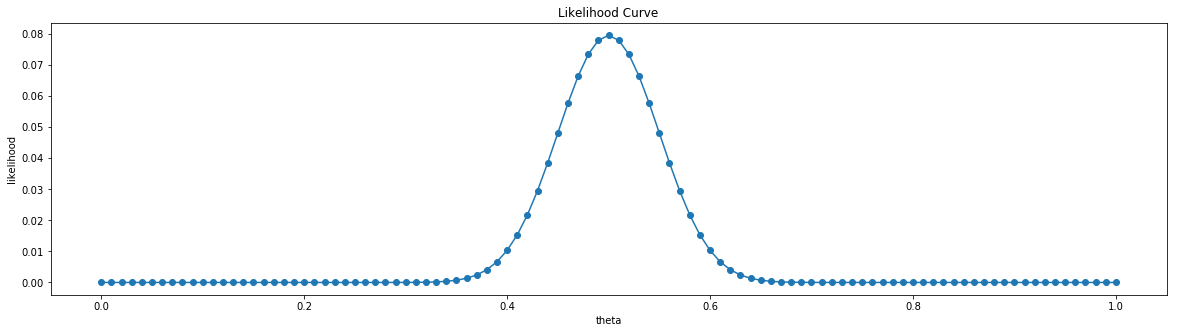

In [99]:
l = create_likelihood_plot_scipy(100, 50)

- likelihood for set of studies
- Consider studies which is doen 3 times, we can have following observation
    - 0 out of 3 outcome are significant
    - 1 out of 3 outcome are significant
    - 2 out of 3 outcome are significant
    - 3 out of 3 outcome are significnt


In [109]:
likelihood_0_3 = np.array(create_likelihood_plot(3, 0, False))

likelihood_1_3 = np.array(create_likelihood_plot(3, 1, False))

likelihood_2_3 = np.array(create_likelihood_plot(3, 2, False))

likelihood_3_3 = np.array(create_likelihood_plot(3, 3, False))

In [102]:
# likelihood_0_3 = likelihood_0_3 / np.max(likelihood_0_3)
# likelihood_1_3 = likelihood_1_3 / np.max(likelihood_1_3) 
# likelihood_2_3 = likelihood_2_3 / np.max(likelihood_2_3)
# likelihood_3_3 = likelihood_3_3 / np.max(likelihood_3_3)

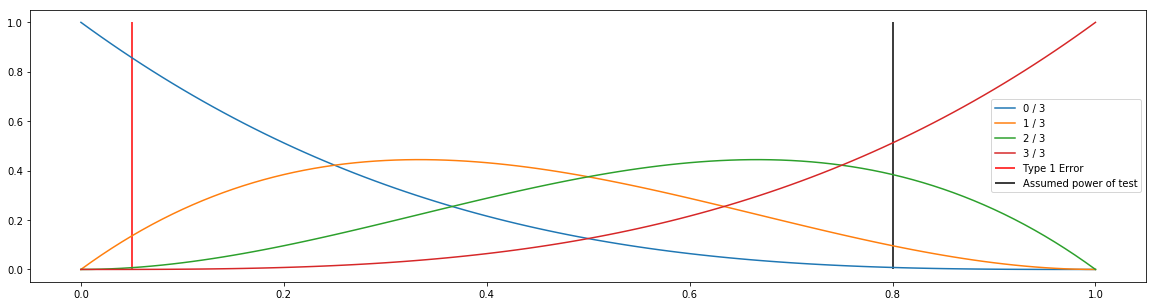

In [110]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, 1.01, 0.01), likelihood_0_3, label="0 / 3")
plt.plot(np.arange(0, 1.01, 0.01), likelihood_1_3, label="1 / 3")
plt.plot(np.arange(0, 1.01, 0.01), likelihood_2_3, label="2 / 3")
plt.plot(np.arange(0, 1.01, 0.01), likelihood_3_3, label="3 / 3")
plt.vlines(0.05, 0,1, 'r' ,label='Type 1 Error')
plt.vlines(0.8, 0,1, label="Assumed power of test")
plt.legend()

In [103]:
?plt.vlines